# Forecast Visualization Dashboard

This notebook provides a comprehensive visualization of the sales forecasting project results.
It covers 5 key areas:
1. **Model Comparison**: Performance metrics across different models.
2. **Test Predictions**: Actual vs Predicted sales on the test set.
3. **90-Day Forecast**: Future sales predictions for the next quarter.
4. **Monthly Forecast**: Aggregated monthly sales outlook.
5. **Category Forecast**: Sales distribution by product category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# Output directory
FORECASTS_DIR = '../outputs/forecasts'

# Visualizations output
VISUALIZATIONS_DIR = '../outputs/visualizations'
os.makedirs(VISUALIZATIONS_DIR, exist_ok=True)


## 1. Model Comparison
Comparing RMSE, MAE, and R2 scores to identify the best performing model.

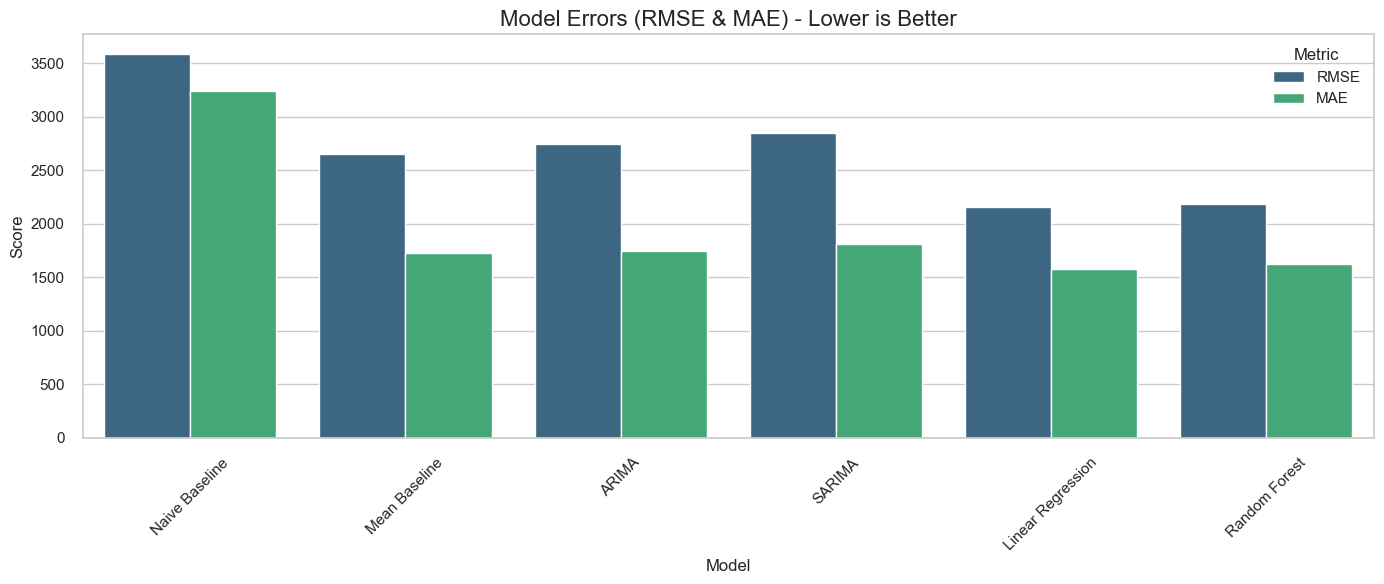

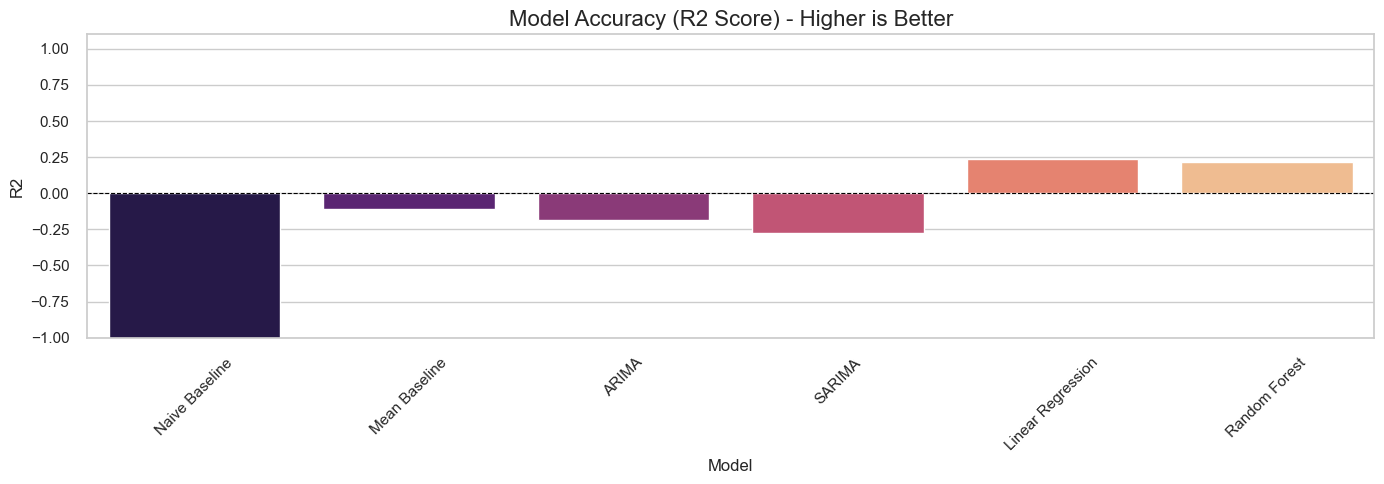

In [2]:
file_path = os.path.join(FORECASTS_DIR, 'model_comparison.csv')
if os.path.exists(file_path):
    df_model = pd.read_csv(file_path)
    if 'Unnamed: 0' in df_model.columns:
        df_model.rename(columns={'Unnamed: 0': 'Model'}, inplace=True)
    
    # Plot RMSE and MAE
    df_melted = df_model.melt(id_vars=['Model'], value_vars=['RMSE', 'MAE'], var_name='Metric', value_name='Score')
    plt.figure(figsize=(14, 6))
    sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='viridis')
    plt.title('Model Errors (RMSE & MAE) - Lower is Better', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'model_errors.png'))
    plt.show()
    
    # Plot R2
    plt.figure(figsize=(14, 5))
    sns.barplot(data=df_model, x='Model', y='R2', hue='Model', palette='magma', legend=False)
    plt.title('Model Accuracy (R2 Score) - Higher is Better', fontsize=16)
    plt.ylim(-1, 1.1)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'model_r2.png'))
    plt.show()
else:
    print("Model comparison file not found.")

## 2. Test Predictions
Visualizing how well the model predicted sales on the test dataset compared to actual values.

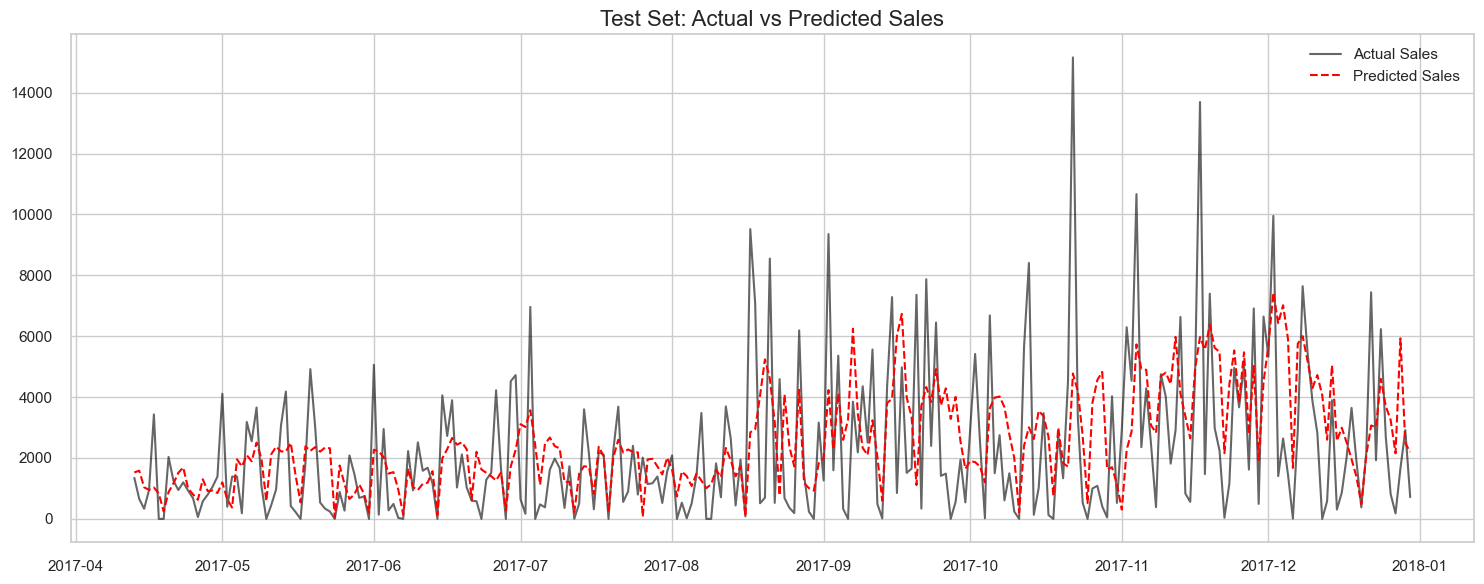

In [3]:
file_path = os.path.join(FORECASTS_DIR, 'test_predictions.csv')
if os.path.exists(file_path):
    df_test = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    
    plt.figure(figsize=(15, 6))
    plt.plot(df_test.index, df_test['Actual'], label='Actual Sales', color='black', alpha=0.6)
    if 'Predicted' in df_test.columns:
        plt.plot(df_test.index, df_test['Predicted'], label='Predicted Sales', color='red', linestyle='--')
    
    plt.title('Test Set: Actual vs Predicted Sales', fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'test_predictions.png'))
    plt.show()
else:
    print("Test predictions file not found.")

## 3. 90-Day Forecast
Projected sales for the next 3 months (Daily).

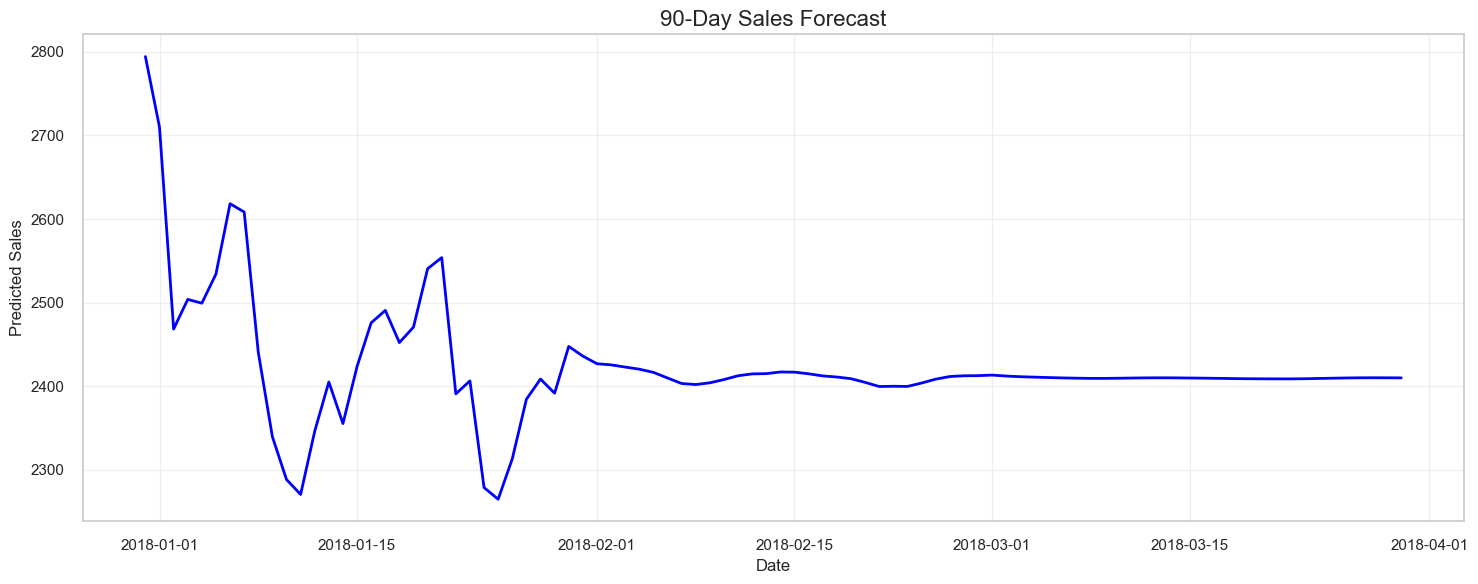

In [4]:
file_path = os.path.join(FORECASTS_DIR, '90day_forecast.csv')
if os.path.exists(file_path):
    df_90 = pd.read_csv(file_path, parse_dates=['Date'])
    
    plt.figure(figsize=(15, 6))
    plt.plot(df_90['Date'], df_90['Predicted_Sales'], color='blue', linewidth=2)
    plt.title('90-Day Sales Forecast', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'forecast_90day.png'))
    plt.show()
else:
    print("90-day forecast file not found.")

## 4. Monthly Forecast
Aggregated sales forecast by month.

C:\Users\dharn\AppData\Local\Temp\ipykernel_11692\2426693838.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_month = pd.read_csv(file_path, parse_dates=['Month'])


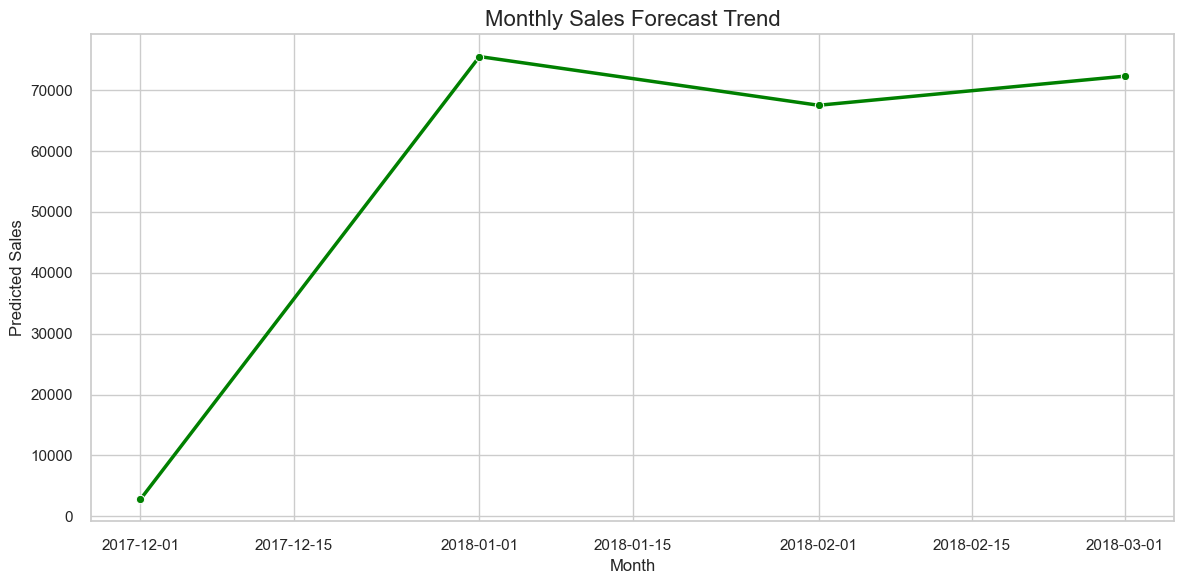

In [5]:
file_path = os.path.join(FORECASTS_DIR, 'monthly_forecast.csv')
if os.path.exists(file_path):
    df_month = pd.read_csv(file_path, parse_dates=['Month'])
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_month, x='Month', y='Predicted Sales', marker='o', linewidth=2.5, color='green')
    plt.title('Monthly Sales Forecast Trend', fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'forecast_monthly.png'))
    plt.show()
else:
    print("Monthly forecast file not found.")

## 5. Category Forecast
Forecasted sales breakdown by product category.

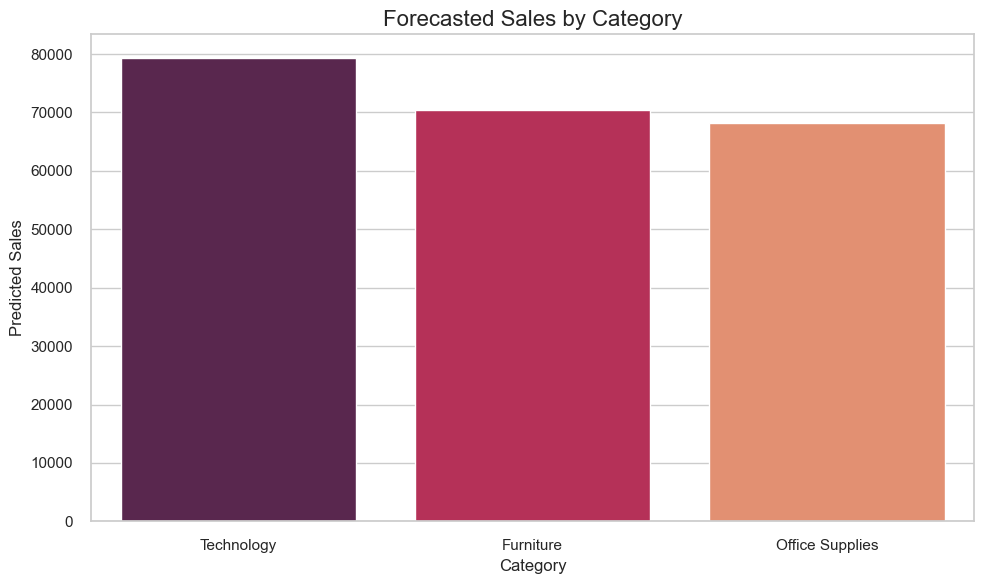

In [6]:
file_path = os.path.join(FORECASTS_DIR, 'category_forecast.csv')
if os.path.exists(file_path):
    df_cat = pd.read_csv(file_path)
    
    # Clean column names if necessary
    if 'Unnamed: 0' in df_cat.columns:
         df_cat.rename(columns={'Unnamed: 0': 'Category'}, inplace=True)
            
    plt.figure(figsize=(10, 6))
    # Assuming columns are Category and Sales/Predicted_Sales
    # If columns are not named 'Category', try to infer or use first column
    x_col = df_cat.columns[0]
    y_col = df_cat.columns[1]
    
    sns.barplot(data=df_cat, x=x_col, y=y_col, hue=x_col, palette='rocket', legend=False)
    plt.title('Forecasted Sales by Category', fontsize=16)
    plt.xlabel('Category')
    plt.ylabel('Predicted Sales')
    plt.tight_layout()
    plt.savefig(os.path.join(VISUALIZATIONS_DIR, 'forecast_category.png'))
    plt.show()
else:
    print("Category forecast file not found.")